<a href="https://colab.research.google.com/github/gabrielterceiro/ReadPDF/blob/main/sale_extract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#install pdfplumber package to extract the text from pdf
!pip install pdfplumber

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 40 kB 6.5 MB/s 
     |████████████████████████████████| 5.6 MB 61.7 MB/s 
     |████████████████████████████████| 142 kB 66.2 MB/s 
     |████████████████████████████████| 3.1 MB 59.8 MB/s 
     |████████████████████████████████| 4.0 MB 77.9 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


In [4]:
#imports
import pdfplumber
import re
from collections import namedtuple
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#create the named tuple pattern
Sale = namedtuple('Sale', 'dt_sale cd_prod nm_prod qt_prod vl_prod')

In [6]:
#using pdfplumber to open the semi structured pdf file and add the text from all pages to a variable
with pdfplumber.open('/content/DadosAnalise.pdf') as pdf:
    text = ''
    for page in pdf.pages:
        text += page.extract_text() 

In [7]:
#create regular expressions to find the sale dates and sale details
new_dt_re = re.compile(r'^([D][at]{3}) (.*)') 
new_sale_re = re.compile(r'\d+ [\w\s]+ (\d+) (.*) ([\d,]+\d{2}) [0] ([\d,]+\d{2})')

In [8]:
#initialize an empty list to append later
lst_sale = []

#run through every line of the text
for line in text.split('\n'):
    #if the line contains a date, stores the date in a variable
    if new_dt_re.match(line):
        dt_string, dt_sale = line.split()

    #if the line contains a sale, stores the important information in their respective variables
    line = new_sale_re.search(line)
    if line:
        cd_prod = line.group(1)
        nm_prod = line.group(2)
        qt_prod = line.group(3)
        vl_prod = line.group(4)
        #append into the list the named tuple with the sale data
        lst_sale.append(Sale(dt_sale, cd_prod, nm_prod, qt_prod, vl_prod))

In [9]:
#stores the data into a dataframe
df = pd.DataFrame(lst_sale)

In [10]:
df.head(10)

dt_sale cd_prod                nm_prod qt_prod vl_prod
0  02/05/2022       2           PICOLE CREME    2,00    5,00
1  02/05/2022      12       POTE ESPECIAL 2L    2,00   35,00
2  02/05/2022      55    KID CASCAO C/ 10 UN    1,00    7,00
3  02/05/2022       2           PICOLE CREME    2,00    5,00
4  02/05/2022       6            PICOLE MAIS    4,00   12,00
5  02/05/2022       9  POTE GRAN NEVADO 1,5L    1,00   15,00
6  02/05/2022      12       POTE ESPECIAL 2L    1,00   17,50
7  02/05/2022      12       POTE ESPECIAL 2L    1,00   17,50
8  02/05/2022      55    KID CASCAO C/ 10 UN    1,00    7,00
9  02/05/2022      18         BEST CUP 750ML    2,00   26,00

In [11]:
item_count = df['nm_prod'].value_counts()

In [12]:
def getInt(input):
  number = input[:-3]
  return int(number)

In [22]:
def getCents(input):
  number = input.replace(',', '')
  return int(number)

In [33]:
def getReais(input):
  number = float(input)
  return number

#Listing the 10 most sold items by quantity

In [18]:
list_items = []
list_amount = []
i = 0
for item in df['nm_prod']:
  if item not in list_items:
    list_items.append(item)
    list_amount.append(getInt(df.iloc[i]['qt_prod']))
  
  if item in list_items:
    list_amount[list_items.index(item)] += getInt(df.iloc[i]['qt_prod'])
  i += 1

In [19]:
n = len(list_items)

for i in range(n):
  already_sorted = True
  for j in range(n - i - 1):
    if list_amount[j] > list_amount[j+1]:
      list_amount[j], list_amount[j + 1] = list_amount[j + 1], list_amount[j]
      list_items[j], list_items[j + 1] = list_items[j + 1], list_items[j]
      already_sorted = False
  if already_sorted:
            break
print(list_items)
print(list_amount)

['CX. PIC. NAPOLITANO C/ 4 UN', 'COBERTURA MARVI CHOCOLATE 300G', 'PICOLE MOCAFFE', 'POTE ZERO ADIC ACUCAR 1L', 'PICOLE KIDS', 'CX. PIC. DIAMOND C/ 4 UN', 'GELADINHO', 'CX. PIC. ZERO ADIC ACUCAR C/ 6UN', 'PICOLE SPECIALE', 'PICOLE NAPOLITANO', 'CX. PIC. MAIS C/ 6UN', 'GARRAFA AGUA 510ML', 'POTE GRAN NEVADO 1,5L', 'PICOLE DIAMOND', 'PICOLE MAIS', 'BEST CUP 750ML', 'CX. PIC. ITUZINHO C/ 4UN', 'PICOLE ZERO ADIC ACUCAR', 'KID CASCAO C/ 10 UN', 'CX. PIC. CREME C/ 6UN', 'CX. PIC. BOMBOM C/ 4 UN', 'PICOLE GREGO', 'CX. PIC. FRUTA C/ 6UN', 'PALITOS MEXICANOS', 'PICOLE BOMBOM', 'PICOLE FRUTA', 'PICOLE ITUZINHO', 'POTE ESPECIAL 2L', 'PICOLE CREME']
[2, 3, 3, 3, 4, 4, 4, 4, 5, 6, 6, 7, 8, 9, 12, 12, 12, 13, 14, 14, 14, 15, 15, 19, 21, 23, 25, 52, 69]


In [20]:
list_items, list_amount = list_items[-10:], list_amount[-10:]

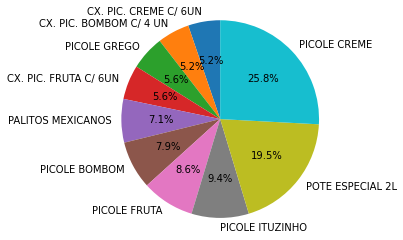

In [ ]:
fig1, ax1 = plt.subplots()

ax1.pie(list_amount, labels = list_items, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.show()

#List the 10 most sold items by value

In [42]:
list_items = []
list_values = []
i = 0
for item in df['nm_prod']:
  if item not in list_items:
    list_items.append(item)
    list_values.append(getCents(df.iloc[i]['vl_prod']))
  
  if item in list_items:
    list_values[list_items.index(item)] += getCents(df.iloc[i]['vl_prod'])
  i += 1

In [43]:
n = len(list_items)

for i in range(n):
  already_sorted = True
  for j in range(n - i - 1):
    if list_values[j] > list_values[j+1]:
      list_values[j], list_values[j + 1] = list_values[j + 1], list_values[j]
      list_items[j], list_items[j + 1] = list_items[j + 1], list_items[j]
      already_sorted = False
  if already_sorted:
            break
print(list_items)
print(list_values)

['GELADINHO', 'GARRAFA AGUA 510ML', 'PICOLE SPECIALE', 'PICOLE MOCAFFE', 'PICOLE KIDS', 'PICOLE NAPOLITANO', 'CX. PIC. NAPOLITANO C/ 4 UN', 'COBERTURA MARVI CHOCOLATE 300G', 'PICOLE MAIS', 'PICOLE ZERO ADIC ACUCAR', 'PICOLE DIAMOND', 'PICOLE GREGO', 'PICOLE FRUTA', 'POTE ZERO ADIC ACUCAR 1L', 'PICOLE ITUZINHO', 'CX. PIC. ZERO ADIC ACUCAR C/ 6UN', 'CX. PIC. DIAMOND C/ 4 UN', 'PICOLE BOMBOM', 'CX. PIC. MAIS C/ 6UN', 'KID CASCAO C/ 10 UN', 'CX. PIC. ITUZINHO C/ 4UN', 'PALITOS MEXICANOS', 'POTE GRAN NEVADO 1,5L', 'BEST CUP 750ML', 'CX. PIC. FRUTA C/ 6UN', 'PICOLE CREME', 'CX. PIC. BOMBOM C/ 4 UN', 'CX. PIC. CREME C/ 6UN', 'POTE ESPECIAL 2L']
[300, 1400, 1500, 1500, 1800, 1800, 2300, 3450, 3600, 3900, 4050, 4500, 4600, 4770, 6250, 6400, 6800, 7350, 9600, 9800, 10800, 11400, 12000, 15600, 15750, 17250, 18200, 19600, 91000]


In [44]:
list_items, list_values = list_items[-10:], list_values[-10:]

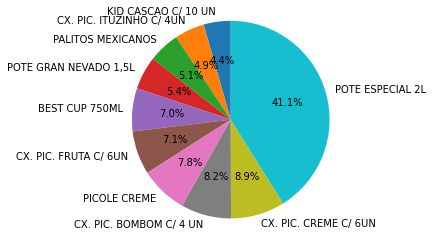

In [45]:
fig1, ax1 = plt.subplots()

ax1.pie(list_values, labels = list_items, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.show()